In [1]:
import os
from cloudmesh.common.Shell import Shell
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
from tqdm.notebook import tqdm
from cloudmesh.common.util import readfile
from cloudmesh.common.util import writefile
from cloudmesh.common.StopWatch import StopWatch 
from cloudmesh.common.systeminfo import systeminfo
import ipywidgets as widgets
from collections import OrderedDict

sns.set_theme(style="whitegrid")

In [2]:
data = OrderedDict()

In [3]:
i5 = [
    ("gregor", "i5", 1), 
    ("gregor", "i5", 2), 
    ("gregor", "i5", 3), 
    ("gregor", "i5", 4), 
      ("gregor", "i5", 5),
      ("gregor", "i5", 6),
      ("gregor", "i5", 7),
      ("gregor", "i5", 8),
      ("gregor", "i5", 9),
      ("gregor", "i5", 10),
      ("gregor", "i5", 11),
      ("gregor", "i5", 12)]
a =  [("gregor", "alienware", i) for i in range(1,33)] 

for user, node, processors in i5:

    label = f"{user}-{node}-{processors}"
    output = f"benchmark/{user}"

    df = pd.read_pickle(f"{output}/{label}-df.pkl")
    # display(df)
    row = list(df.iloc[[-1]].values[0])
    # row = list(df.iloc[[4]].values[0])
    print (processors, row)
    data[str(processors)] = row

1 [48.148, 49.963, 48.512, 48.293, 48.192, 49.091, 48.472, 48.318, 48.33, 48.702]
2 [25.413, 25.174, 24.997, 24.973, 24.637, 24.886, 24.694, 24.866, 25.302, 25.234]
3 [16.784, 16.736, 16.878, 16.803, 17.086, 16.695, 16.979, 16.823, 17.013, 16.803]
4 [12.641, 12.642, 12.674, 13.274, 12.856, 13.009, 12.816, 12.736, 12.629, 12.565]
5 [10.693, 10.348, 10.315, 10.664, 10.177, 10.216, 10.279, 10.763, 10.356, 10.223]
6 [8.578, 8.641, 8.571, 8.63, 8.516, 8.653, 8.593, 8.603, 8.925, 8.574]
7 [14.897, 15.171, 14.669, 15.152, 14.91, 15.14, 14.983, 15.816, 15.117, 15.074]
8 [13.202, 13.247, 13.073, 13.223, 13.104, 13.176, 13.283, 13.198, 13.319, 13.36]
9 [11.632, 11.893, 11.836, 11.865, 11.711, 11.862, 11.622, 11.761, 11.752, 11.765]
10 [10.618, 10.546, 10.751, 10.727, 10.557, 10.6, 10.725, 10.761, 10.61, 10.61]
11 [9.602, 9.725, 9.639, 9.685, 9.6, 9.685, 9.703, 9.606, 9.699, 9.625]
12 [8.896, 8.92, 8.887, 8.997, 8.881, 8.951, 8.951, 8.917, 8.871, 9.054]


In [4]:
result = pd.DataFrame(data)
result.index.name = "Trial"
result

,1,2,3,4,5,6,7,8,9,10,11,12
Trial,,,,,,,,,,,,
0,48.148,25.413,16.784,12.641,10.693,8.578,14.897,13.202,11.632,10.618,9.602,8.896
1,49.963,25.174,16.736,12.642,10.348,8.641,15.171,13.247,11.893,10.546,9.725,8.920
2,48.512,24.997,16.878,12.674,10.315,8.571,14.669,13.073,11.836,10.751,9.639,8.887
3,48.293,24.973,16.803,13.274,10.664,8.630,15.152,13.223,11.865,10.727,9.685,8.997
4,48.192,24.637,17.086,12.856,10.177,8.516,14.910,13.104,11.711,10.557,9.600,8.881
5,49.091,24.886,16.695,13.009,10.216,8.653,15.140,13.176,11.862,10.600,9.685,8.951
6,48.472,24.694,16.979,12.816,10.279,8.593,14.983,13.283,11.622,10.725,9.703,8.951
7,48.318,24.866,16.823,12.736,10.763,8.603,15.816,13.198,11.761,10.761,9.606,8.917
8,48.330,25.302,17.013,12.629,10.356,8.925,15.117,13.319,11.752,10.610,9.699,8.871


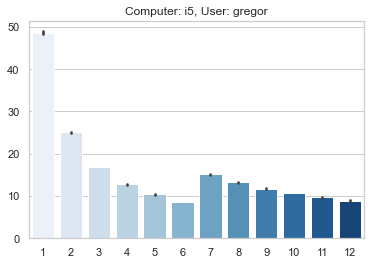

In [5]:
#sns.boxplot(data=result);
#sns.swarmplot(data=result);
sns.barplot(data=result, palette="Blues").set_title(f'Computer: {node}, User: {user}');



In [6]:
result.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,48.602100,25.017600,16.860000,12.784200,10.40340,8.628400,15.092900,13.218500,11.769900,10.650500,9.656900,8.932500
std,0.552849,0.258371,0.127023,0.217034,0.21823,0.111587,0.297997,0.089377,0.095355,0.081828,0.047487,0.057581
min,48.148000,24.637000,16.695000,12.565000,10.17700,8.516000,14.669000,13.073000,11.622000,10.546000,9.600000,8.871000
25%,48.299250,24.871000,16.788750,12.641250,10.23700,8.575000,14.928250,13.181500,11.721250,10.602500,9.610750,8.889250
50%,48.401000,24.985000,16.813000,12.705000,10.33150,8.598000,15.095500,13.212500,11.763000,10.614000,9.662000,8.918500
75%,48.654500,25.219000,16.953750,12.846000,10.58700,8.638250,15.149000,13.274000,11.855500,10.726500,9.695500,8.951000
max,49.963000,25.413000,17.086000,13.274000,10.76300,8.925000,15.816000,13.360000,11.893000,10.761000,9.725000,9.054000


In [7]:
df_line = pd.DataFrame({
    "Processors": list(result.columns),
    "Time in s": list(result.describe(include='all').loc['mean'])           
                 })
df_line["Processors"] = pd.to_numeric(df_line["Processors"])


In [8]:
df_line["Sum"] = df_line["Time in s"] * df_line["Processors"]
df_line

,Processors,Time in s,Sum
0,1,48.6021,48.6021
1,2,25.0176,50.0352
2,3,16.8600,50.5800
3,4,12.7842,51.1368
4,5,10.4034,52.0170
5,6,8.6284,51.7704
6,7,15.0929,105.6503
7,8,13.2185,105.7480
8,9,11.7699,105.9291
9,10,10.6505,106.5050


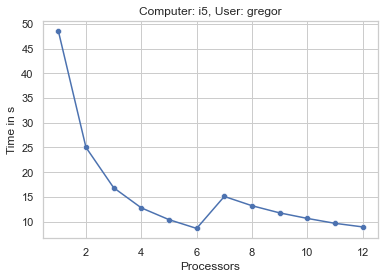

In [9]:
sns.scatterplot(data=df_line, x="Processors", y="Time in s");
sns.lineplot(data=df_line, x="Processors", y="Time in s").set_title(f'Computer: {node}, User: {user}');

In [10]:
df_line.describe()

,Processors,Time in s,Sum
count,12.000000,12.000000,12.000000
mean,6.500000,15.968075,78.449150
std,3.605551,11.225783,29.008243
min,1.000000,8.628400,48.602100
25%,3.750000,10.216775,50.997600
50%,6.500000,12.277050,78.833650
75%,9.250000,15.534675,106.003300
max,12.000000,48.602100,107.190000
